# 3 - Telco Customer Churn: Revisiting the Data
## EDA Post-Modeling
### Alden Chico

---

## Premise - Exploratory Data Analysis After Modeling

From the last post, we looked at using neural networks to predict customer churn based on user profiles for a telecommunication service company, Telco. Neural networks are a powerful tool that offers some of the best predictive analytical performance given enough features and data. Modeling the Telco dataset with a neural network performed similarly to modeling using random forest classification with 78% accuracy and 57% F1-score.

So far, we've looked at modeling customer churn using logistic regression, decision tree classification, random forest classification, and neural networks. It would be a good idea to look back at the data and observe trends in user profiles for customers that churned and didn't churn to find if there's any information about the data that we might've missed on our first round of EDA to improve our predictive models.

---

## Importing Data

As always, the first step in performing any data analytics is importing the data to the program. We do this using pandas DataFrames as shown below.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import the Telco churn dataset with all OHE features from CSV file
data_all = pd.read_csv('output/2-EDA/all_features_telco.csv', index_col='customerID')
data_all = data_all.drop('Unnamed: 0', axis=1)
data_all.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,tenure,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,1,29.85,29.85,0
5575-GNVDE,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,1,0,34,56.95,1889.50,0
3668-QPYBK,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,1,0,2,53.85,108.15,1
7795-CFOCW,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,45,42.30,1840.75,0
9237-HQITU,1,0,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,2,70.70,151.65,1


---

## Estimating Sample Proportion of Users that Churned

One of the first things we can do is infer population proportion of users that churned using the sample dataset that we were provided. To do this, we can use a bootstrap hypothesis test to infer the true population proportion.

A bootstrap hypothesis test takes random trials from the data provided with replacement to create a bootstrap sample. The test statistic, in this case the proportion of users that churned, is measured using the bootstrap sample to create a boostrap replicate. Repeating this process 1000 times yields an approximately normally distributed curve thanks to the Central Limit Theorem. Using this normally distributed curve, we can infer confidence intervals where the true proportion of users that churned lies.

The process to gathering a distibution of proportions for users that churn using bootstrap testing is shown below.

In [3]:
np.random.seed(42)

churn_replicates = []
num_rows = data_all.shape[0]
samples_list = list(range(num_rows))
for i in range(1000):
    bs_sample = list(np.random.choice(samples_list, num_rows))
    sample_rows = data_all.iloc[bs_sample, :]
    sample_churn = sample_rows.groupby('churn')['churn'].count()
    p_churn = sample_churn[1]/num_rows
    churn_replicates.append(p_churn)

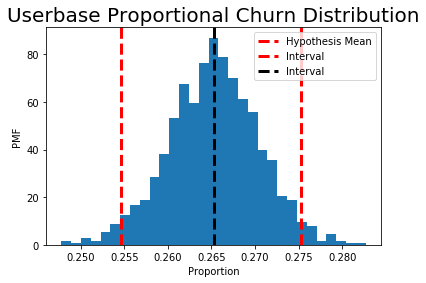

proportion of users that churned = 0.265
lower interval = 0.255
upper interval = 0.275


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

intervals = np.percentile(churn_replicates, [2.5, 97.5])
center = np.mean(churn_replicates)
bins = int(np.sqrt(len(churn_replicates)))
_ = plt.hist(churn_replicates, bins=bins, density=True)
_ = plt.axvline(intervals[0], color='red', linestyle='dashed', linewidth=3)
_ = plt.axvline(intervals[1], color='red', linestyle='dashed', linewidth=3)
_ = plt.axvline(center, color='black', linestyle='dashed', linewidth=3)
_ = plt.title('Userbase Proportional Churn Distribution', fontsize=20)
_ = plt.xlabel('Proportion')
_ = plt.ylabel('PMF')

_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval'), loc='upper right')

plt.show()

# Print summary statistics
print('proportion of users that churned = {:.3f}'.format(center))
print('lower interval = {:.3f}'.format(intervals[0]))
print('upper interval = {:.3f}'.format(intervals[1]))

After bootstrap testing the data that we were provided, we find that the true proportion of users that churned is around 26.5%, give or take 1%.

Although the dataset here has a 26.5% churn rate, that doesn't necessarily mean that the overall customer base for Telco is churning at this rate. In order to make inferences, the data must satisfy simple random sampling. The data provided might not be totally random due to selection bias. Selection bias on the side of Telco to provide more data for predictive analytics on churning customers would affect the sampling proportion for our bootstrap tests. Telco did not disclose sampling methods with the data provided.

If the data satisfies inference conditions, then 26.5% churn for a telecommunication service is truly concerning. Josh Pigford, founder of metrics and business insight company Baremetrics, stated that "if churn isn't in the single digits, it's absolutely the only thing you should be focusing on". Telco needs to look at impacting their user base in order to retain the state of its business.

---

## Finding Average Length of Time Before Users Churned

Another important metric to measure for the data is finding how long an average user spent using Telco's services before churning. To infer this metric, we can bootstrap test like we did for measuring the proportion of users that churned by measuring the average tenure of users that churned instead.

In [5]:
np.random.seed(42)

avg_tenure_list = []
num_rows = data_all.shape[0]
samples_list = list(range(num_rows))
for i in range(1000):
    bs_sample = list(np.random.choice(samples_list, num_rows))
    sample_rows = data_all.iloc[bs_sample, :]
    avg_tenure = sample_rows.groupby('churn')['tenure'].mean()
    avg_tenure_list.append(avg_tenure[1])

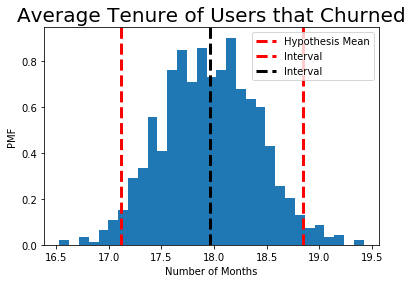

months before users churned = 17.962 months
lower interval = 17.115
upper interval = 18.848


In [6]:
intervals = np.percentile(avg_tenure_list, [2.5, 97.5])
center = np.mean(avg_tenure_list)
bins = int(np.sqrt(len(avg_tenure_list)))
_ = plt.hist(avg_tenure_list, bins=bins, density=True)
_ = plt.axvline(intervals[0], color='red', linestyle='dashed', linewidth=3)
_ = plt.axvline(intervals[1], color='red', linestyle='dashed', linewidth=3)
_ = plt.axvline(center, color='black', linestyle='dashed', linewidth=3)
_ = plt.title('Average Tenure of Users that Churned', fontsize=20)
_ = plt.xlabel('Number of Months')
_ = plt.ylabel('PMF')

_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval'), loc='upper right')

plt.show()

# Print summary statistics
print('months before users churned = {:.3f} months'.format(center))
print('lower interval = {:.3f}'.format(intervals[0]))
print('upper interval = {:.3f}'.format(intervals[1]))

After boostrap testing our data, we find that users that churned spend around 18 months with Telco's services, give or take 1 month. Length bias is a potential source of bias, where Telco may have pulled this data from a time period where services were priced differently, advertised differently, etc. Again, this bias may affect inferences detailing customers that churn now than from the past.

Essentially, an 18 month time period is a long amount of time before users decide to leave Telco for an alternative telecommunication company. This means that Telco can use a predictive model to flag users who are at risk of churning when they sign up for their Telco services.  Data analytics show that the average user that's at risk of churning won't leave Telco's services before reaching that 18 month mark. Telco can spend these 18 months charging the customer at full price before reaching out to the user to provide them with incentives before leaving their services which comes at the expense of Telco.

---

## Comparing Difference in Monthly Charges Between Users that Churned / Didn't Churn

One factor that significantly impacts the user's desire to stay with any service is how much the service is priced. Because of this, we should look at how much Telco is charging users that churned and didn't churn to find if there's a difference between the two. Bootstrap testing allows us to model a distribution for average monthly charges for users that churned and didn't churn.

In [7]:
np.random.seed(42)

# Lists to hold bootstrap replicates
no_churn_avg_month = []
churn_avg_month = []
num_rows = data_all.shape[0]
samples_list = list(range(num_rows))
for i in range(1000):
    # Generate bootstrap samples
    bs_sample = list(np.random.choice(samples_list, num_rows))
    sample_rows = data_all.iloc[bs_sample, :]
    # Find average monthly charge stratified by churn
    avg_monthly = sample_rows.groupby('churn')['MonthlyCharges'].mean()
    # Take the average monthly charge as a bootstrap sample
    no_churn_avg_sample = avg_monthly[0]
    churn_avg_sample = avg_monthly[1]
    # Add bootstrap sample to bootstrap replicate lists
    no_churn_avg_month.append(no_churn_avg_sample)
    churn_avg_month.append(churn_avg_sample)

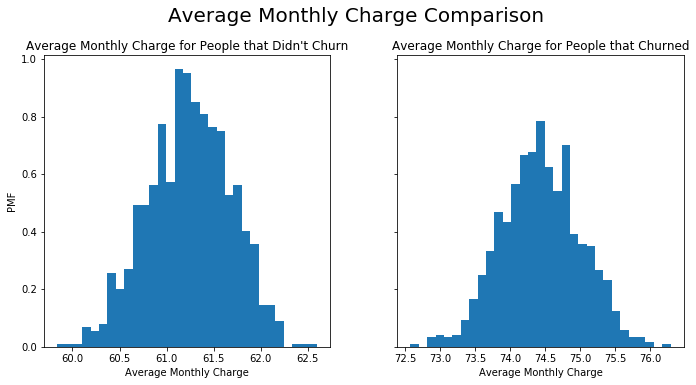

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)
_ = fig.suptitle('Average Monthly Charge Comparison', y=1.06, fontsize=20)
_ = axs[0].set_xlabel('Average Monthly Charge')
_ = axs[1].set_xlabel('Average Monthly Charge')
_ = axs[0].set_ylabel('PMF')

bins = int(np.sqrt(len(no_churn_avg_month)))
_ = axs[0].hist(no_churn_avg_month, bins=bins, density=True)
_ = axs[0].set_title('Average Monthly Charge for People that Didn\'t Churn')

bins = int(np.sqrt(len(churn_avg_month)))
_ = axs[1].hist(churn_avg_month, bins=bins, density=True)
_ = axs[1].set_title('Average Monthly Charge for People that Churned')


plt.tight_layout()
plt.show()

Using bootstrap testing, we can see that the average amount charged to users that churned is around $13 more than users that didn't churn.

With measuring the difference between two averages, it's important to note that the difference may be due to random chance. There might not exist a difference between the two populations and the observed difference cannot definitively determine the existence of an actual difference.

With this in mind, we can empirically analyze the difference between two means using a null hypothesis test. For this null hypothesis test, our null hypothesis is that there is no difference in the average amount charged between users that churned and didn't churn. Our alternative hypothesis is that a difference exists. If the observed average difference lies outside a 95\% confidence interval, then we will reject the null hypothesis in favor for the alternative.

In [9]:
no_churn_mean = np.mean(no_churn_avg_month)
no_churn_std = np.std(no_churn_avg_month) / np.sqrt(len(no_churn_avg_month))

churn_mean = np.mean(churn_avg_month)
churn_std = np.std(churn_avg_month) / np.sqrt(len(churn_avg_month))

mean_diff = no_churn_mean - churn_mean
std_diff = np.sqrt(no_churn_std**2 + churn_std**2)

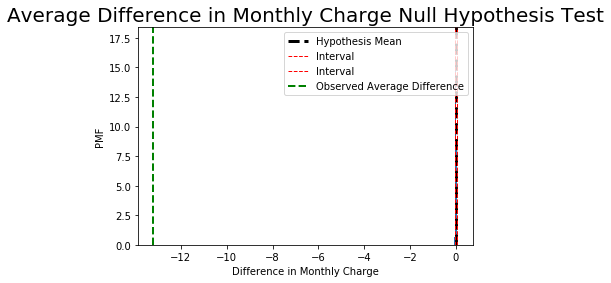

mu_not = $0.00
lower interval = $-0.04
upper interval = $0.04
observed difference = $-13.20
observed z-score = -583.22


In [10]:
np.random.seed(42)

mu_not = 0
z_obs = (mean_diff - mu_not) / std_diff
samples = np.random.normal(mu_not, std_diff, 10000)
intervals = np.percentile(samples, [2.5, 97.5])

# Plot the generated points as a histogram with markers indicating confidence interval, mean, and observation
_ = plt.hist(samples, bins=bins, density=True)
_ = plt.axvline(mu_not, color='black', linestyle='dashed', linewidth=3)
_ = plt.axvline(intervals[0], color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(intervals[1], color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_diff, color='green', linestyle='dashed', linewidth=2)

# Display the distribution
_ = plt.title('Average Difference in Monthly Charge Null Hypothesis Test', fontsize=20)
_ = plt.xlabel('Difference in Monthly Charge')
_ = plt.ylabel('PMF')
_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval', 'Observed Average Difference'), loc='upper right')
plt.show()

# Print summary statistics
print('mu_not = ${:.2f}'.format(mu_not))
print('lower interval = ${:.2f}'.format(intervals[0]))
print('upper interval = ${:.2f}'.format(intervals[1]))
print('observed difference = ${:.2f}'.format(mean_diff))
print('observed z-score = {:.2f}'.format(z_obs))

With a \\$0.00 difference between average monthly charges for users that didn't churn and churned, the 95\% confidence interval lied between -\$0.04 and \$0.04. However, the observed difference from the data that we were provided was -$13.20. The p-value of -583.22 lies way outside the alpha value of +/-1.96 for a 95% confidence interval with the null hypothesis being true. Since the observed difference is outside our confidence interval, then we will reject the assertion that there is no difference in average monthly amount charged between users that churned and didn't churn in favor for the alternative that a difference exists.

### Finding Proportion of Users that Churned Who Were Charged More than \$75.00 Per Month

Since we now know that users who are being charged \$75 or more are at higher risk of churning, we can perform a boostrap test to infer the true proportion of users that churned who are getting charged more than this amount.

In [28]:
d = data_all.loc[data_all.MonthlyCharges >= 75, :]
d.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,tenure,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,,
9305-CDSKC,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,1,0,8,99.65,820.50,1
1452-KIOVK,0,1,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,22,89.10,1949.40,0
7892-POOKP,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,28,104.80,3046.05,1
8091-TTVAX,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,58,100.35,5681.10,0
0280-XJGEX,0,1,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,49,103.70,5036.30,1


In [29]:
np.random.seed(42)

churn_replicates = []
num_rows = d.shape[0]
samples_list = list(range(num_rows))
for i in range(1000):
    bs_sample = list(np.random.choice(samples_list, num_rows))
    sample_rows = d.iloc[bs_sample, :]
    sample_churn = sample_rows.groupby('churn')['churn'].count()
    p_churn = sample_churn[1]/num_rows
    churn_replicates.append(p_churn)

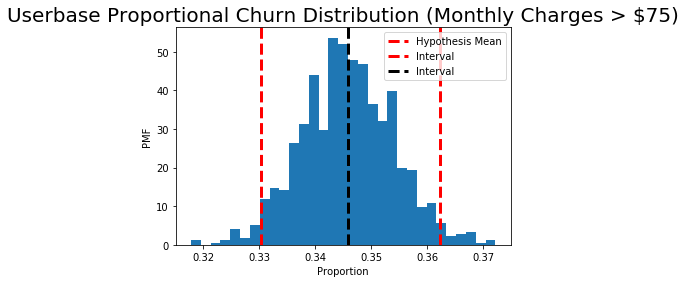

proportion of users that churned = 0.346
lower interval = 0.330
upper interval = 0.362


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

intervals = np.percentile(churn_replicates, [2.5, 97.5])
center = np.mean(churn_replicates)
bins = int(np.sqrt(len(churn_replicates)))
_ = plt.hist(churn_replicates, bins=bins, density=True)
_ = plt.axvline(intervals[0], color='red', linestyle='dashed', linewidth=3)
_ = plt.axvline(intervals[1], color='red', linestyle='dashed', linewidth=3)
_ = plt.axvline(center, color='black', linestyle='dashed', linewidth=3)
_ = plt.title('Userbase Proportional Churn Distribution (Monthly Charges > $75)', fontsize=20)
_ = plt.xlabel('Proportion')
_ = plt.ylabel('PMF')

_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval'), loc='upper right')

plt.show()

# Print summary statistics
print('proportion of users that churned = {:.3f}'.format(center))
print('lower interval = {:.3f}'.format(intervals[0]))
print('upper interval = {:.3f}'.format(intervals[1]))

We can see that users that 34.6\% of users that are being charged more than \$75.00 per month churn which is more than the overall population churn rate of 26.5\%.

Now that we know that users are more likely to churn if they're being charged more than \\$75 per month, we can filter the data from users that are being charged less than this amount which should help the predictive model determine users that churned and didn't churn more accurately.

---

## Comparing Services Between Users that Churned and Didn't Churn

The last bit of exploratory data analysis we'll do for this step is looking at a different method of feature selection. The last time we performed feature selection, we performed random forest classification to extract the feature importances attribute that measures feature importance by difference in gini impurity on leaf node splits. The issue with finding important features this way is that it uses predictive modeling to find the most important features. Instead, we can use the Chi^2 Test to find important features from our data without having to use predictive modeling to do so.

Chi^2 Testing does this by measuring outcome dependence on a feature using a Chi^2 statistic. The chi^2 statistic takes the squared difference of the data's expected value and actual value and divides it by the expected value. This can better be explained using an example, so let's just take the code below, run it, and explain how the chi^2 statistic is a good method of selecting features.

In [11]:
cat_data = data_all.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
cat_comparison = cat_data.groupby('churn').sum()
cat_comparison

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1
churn,,,,,,,,,,,,,,,,,,,,,
0,2549,2625,2441,2733,3390,1784,512,4662,2541,512,...,1307,1647,2403,2771,1286,1290,1294,1304,4508,666
1,939,930,1200,669,1543,326,170,1699,849,170,...,166,48,469,1400,258,232,1071,308,1393,476


In [12]:
from scipy.stats import chi2_contingency

chi2_cont = chi2_contingency(cat_comparison.values)
exp = pd.DataFrame(data=chi2_cont[3], columns=cat_comparison.columns, index=cat_comparison.index)
exp

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1
churn,,,,,,,,,,,,,,,,,,,,,
0,2562.389891,2611.610109,2674.7883,2499.2117,3623.930427,1550.069573,501.017748,4672.982252,2490.396138,501.017748,...,1082.11018,1245.198069,2109.857731,3064.142269,1134.268919,1118.107057,1737.400256,1184.223768,4335.052392,838.947608
1,925.610109,943.389891,966.2117,902.7883,1309.069573,559.930427,180.982252,1688.017748,899.603862,180.982252,...,390.88982,449.801931,762.142269,1106.857731,409.731081,403.892943,627.599744,427.776232,1565.947608,303.052392


In [13]:
cont_table = (cat_comparison.values - exp.values)**2/exp.values
cont_table = pd.DataFrame(data=cont_table, columns=cat_comparison.columns, index=cat_comparison.index)
cont_table

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1
churn,,,,,,,,,,,,,,,,,,,,,
0,0.069970,0.068651,20.434129,21.869684,15.100578,35.303864,0.240730,0.025810,1.028250,0.240730,...,46.737783,129.653905,40.728997,28.044517,20.297057,26.426078,113.159755,12.114556,6.899772,35.652852
1,0.193698,0.190048,56.568317,60.542399,41.803313,97.732579,0.666418,0.071451,2.846532,0.666418,...,129.385388,358.924186,112.751114,77.636346,56.188856,73.155980,313.263013,33.537033,19.100815,98.698693


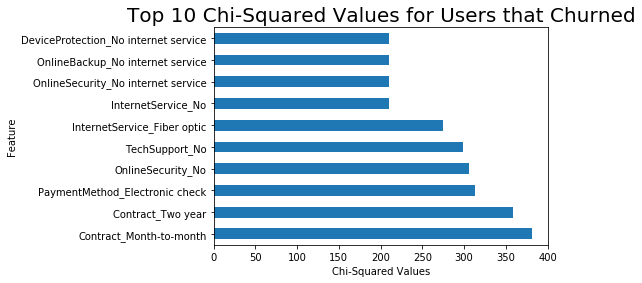

In [14]:
# Plot the feature importance value for the 10 most important features

churn_chi_square = pd.Series(cont_table.loc[1], index=cont_table.columns)
_ = plt.title('Top 10 Chi-Squared Values for Users that Churned', fontsize=20)
_ = plt.ylabel('Feature')
_ = plt.xlabel('Chi-Squared Values')
_ = churn_chi_square.nlargest(10).plot(kind='barh')

In [15]:
actual_cm2m = cat_comparison.loc[1, 'Contract_Month-to-month']
exp_cm2m = exp.loc[1, 'Contract_Month-to-month']
chi_square_cm2m = cont_table.loc[1, 'Contract_Month-to-month']

print('EXAMPLE CHI-SQUARED VALUE')
print(f'Actual Number of Churn Users Signed to Month-to-Month Contracts: {int(actual_cm2m)}')
print(f'Expected Number of Users Signed to Month-to-Month Contracts: {int(exp_cm2m)}')
print(f'Chi-Squared Value for Churn Users Signed to Month-to-Month Contracts: {int(chi_square_cm2m)}')

EXAMPLE CHI-SQUARED VALUE
Actual Number of Churn Users Signed to Month-to-Month Contracts: 1655
Expected Number of Users Signed to Month-to-Month Contracts: 1028
Chi-Squared Value for Churn Users Signed to Month-to-Month Contracts: 381


So the final graph shows the 10 most important categorical features using Chi^2 analysis. The last code snippet above shows how each chi^2 value was evaluated using the most important feature from our analysis, month-to-month contracts. 1655 users that churned were assigned month-to-month contracts. The expected number of users who churned that were assigned month-to-month contracts is the proportion of users that churned times the number of users that were signed up for month-to-month contracts. From our data, 3880 total users signed up for month-to-month contracts and 26.5\% of users churned, therefore, the expected number of month-to-month users that churned is 1028. The chi^2 value between the expected and actual values for this portion of the dataset is 381. The greater the chi^2 value, the greater the difference between what was observed vs. what was expected given that user churn is independent from the outcome. Since these 10 categories have the highest observed difference between observations and expectations, we can filter our dataset from features that didn't have a strong association with user churn.

---

---

## Saving New Dataset For Predictive Modeling

The new dataset we'll save for this project comes from the top 10 features that we analyzed above, the tenure, and the monthly amount charged for each user. We'll eliminate the total amount charged since that amount is the product between tenure and monthly amount charged so it doesn't provide predictive models with any new information. With this new dataset saved, we can now revisit predictive modeling and see if we can squeeze out better performance using the same data with our newly selected feature set.

In [42]:
top_cat = ['DeviceProtection_No internet service', 'OnlineBackup_No internet service',
          'OnlineSecurity_No internet service', 'InternetService_No', 'InternetService_Fiber optic',
          'TechSupport_No', 'OnlineSecurity_No', 'PaymentMethod_Electronic check', 'Contract_Two year',
          'Contract_Month-to-month', 'churn']
num_cat = ['MonthlyCharges', 'tenure']
data_sel = data_all.loc[:, top_cat + num_cat]
data_sel = data_sel.loc[data_sel.MonthlyCharges >= 75, :]
data_sel.head()

,DeviceProtection_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,InternetService_No,InternetService_Fiber optic,TechSupport_No,OnlineSecurity_No,PaymentMethod_Electronic check,Contract_Two year,Contract_Month-to-month,churn,MonthlyCharges,tenure
customerID,,,,,,,,,,,,,
9305-CDSKC,0,0,0,0,1,1,1,1,0,1,1,99.65,8
1452-KIOVK,0,0,0,0,1,1,1,0,0,1,0,89.10,22
7892-POOKP,0,0,0,0,1,0,1,1,0,1,1,104.80,28
8091-TTVAX,0,0,0,0,1,1,1,0,0,0,0,100.35,58
0280-XJGEX,0,0,0,0,1,1,1,0,0,1,1,103.70,49


In [52]:
_ = data_sel.to_csv('output/5-EDA_Revisited/new_selected_features.csv')